In [30]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import json
%matplotlib inline


In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import train_test_split

/home/dan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
dataset = pd.read_json('SatCatdata.json')

In [4]:
dataset.columns

Index(['APOGEE', 'COMMENT', 'COMMENTCODE', 'COUNTRY', 'CURRENT', 'DECAY',
       'FILE', 'INCLINATION', 'INTLDES', 'LAUNCH', 'LAUNCH_NUM',
       'LAUNCH_PIECE', 'LAUNCH_YEAR', 'NORAD_CAT_ID', 'OBJECT_ID',
       'OBJECT_NAME', 'OBJECT_NUMBER', 'OBJECT_TYPE', 'PERIGEE', 'PERIOD',
       'RCSVALUE', 'RCS_SIZE', 'SATNAME', 'SITE'],
      dtype='object')

In [5]:
array = dataset.values

In [33]:
train_data, test_data = train_test_split(dataset, test_size=0.20, train_size=0.80)

,APOGEE,COMMENT,COMMENTCODE,COUNTRY,CURRENT,DECAY,FILE,INCLINATION,INTLDES,LAUNCH,...,OBJECT_ID,OBJECT_NAME,OBJECT_NUMBER,OBJECT_TYPE,PERIGEE,PERIOD,RCSVALUE,RCS_SIZE,SATNAME,SITE
8994,921,NaN,3.0,US,Y,NaN,5951,89.88,1964-083M,1964-12-13,...,1964-083M,TRANSIT 5E-5 DEB,28248,DEBRIS,754,101.66,0,SMALL,TRANSIT 5E-5 DEB,AFWTR
1000,945,NaN,NaN,FR,Y,NaN,6107,98.85,1986-019HX,1986-02-22,...,1986-019HX,ARIANE 1 DEB,17543,DEBRIS,771,102.10,0,SMALL,ARIANE 1 DEB,FRGUI
9344,962,NaN,NaN,US,Y,NaN,6124,28.80,1977-065BG,1977-07-14,...,1977-065BG,DELTA 1 DEB,10229,DEBRIS,606,100.54,0,SMALL,DELTA 1 DEB,AFETR
5527,1667,NaN,NaN,US,Y,NaN,6085,102.12,1976-077DF,1976-07-29,...,1976-077DF,DELTA 1 DEB,12274,DEBRIS,1499,117.83,0,SMALL,DELTA 1 DEB,AFWTR
1275,728,NaN,NaN,PRC,Y,NaN,6123,98.17,2016-081D,2016-12-21,...,2016-081D,SPARK 2,41901,PAYLOAD,691,98.97,0,MEDIUM,SPARK 2,JSC
4891,2381,NaN,NaN,US,Y,NaN,6131,69.15,1965-063AE,1965-08-10,...,1965-063AE,SCOUT B DEB,37862,DEBRIS,963,119.81,0,SMALL,SCOUT B DEB,WLPIS
12082,743,NaN,NaN,US,Y,NaN,6131,92.71,1971-089A,1971-10-17,...,1971-089A,ASTEX 1,5560,PAYLOAD,723,99.46,0,LARGE,ASTEX 1,AFWTR
3924,977,NaN,NaN,US,Y,NaN,6108,28.84,1977-065AH,1977-07-14,...,1977-065AH,DELTA 1 DEB,10204,DEBRIS,530,99.90,0,SMALL,DELTA 1 DEB,AFETR
4333,1675,NaN,NaN,US,Y,NaN,6128,28.42,1977-048B,1977-06-16,...,1977-048B,DELTA 1 R/B(1),10062,ROCKET BODY,569,107.74,0,LARGE,DELTA 1 R/B(1),AFETR
11233,1461,NaN,NaN,US,Y,NaN,6107,101.71,1974-089DD,1974-11-15,...,1974-089DD,THORAD DELTA 1 DEB,8566,DEBRIS,1332,113.70,0,SMALL,THORAD DELTA 1 DEB,AFWTR


In [6]:
countries = array[:,3]
object_type = array[:,18]
radar_cross_section = array[:, 21]    # small < .1m^2, medium .1 - 1 m^2, large > 1m^2
apogee = array[:, 0]     # km
perigee = array[:, 18]   # km
period = array[:, 19]    # minutes
mu = 398600

In [7]:
# Computue the semi-major axis
a = (apogee + perigee)/2.00
v_mean = np.divide(2*np.pi*a,period*60,  out=np.zeros_like(a), where=a!=0) # km/s

In [8]:
v_mean

array([0.875402934296038, 0.8749753002054539, 1.2037728624341122, ...,
       1.585542629469614, 1.614977313580642, 1.505540437244697], dtype=object)

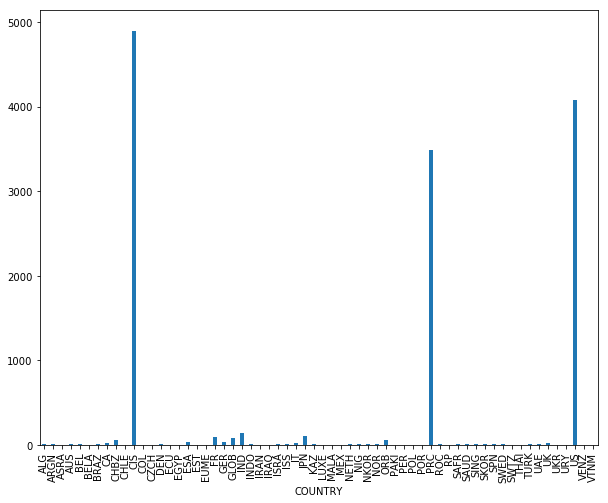

In [33]:
dfcountry = dataset.groupby(['COUNTRY'])['COUNTRY'].count()
dfcountry.plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 10)

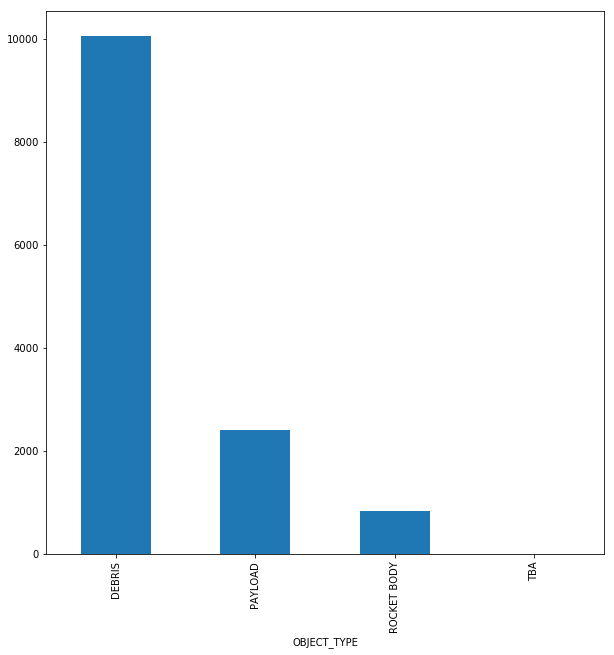

In [35]:
dfobjects = dataset.groupby(['OBJECT_TYPE'])['OBJECT_TYPE'].count()
dfobjects.plot(kind='bar')

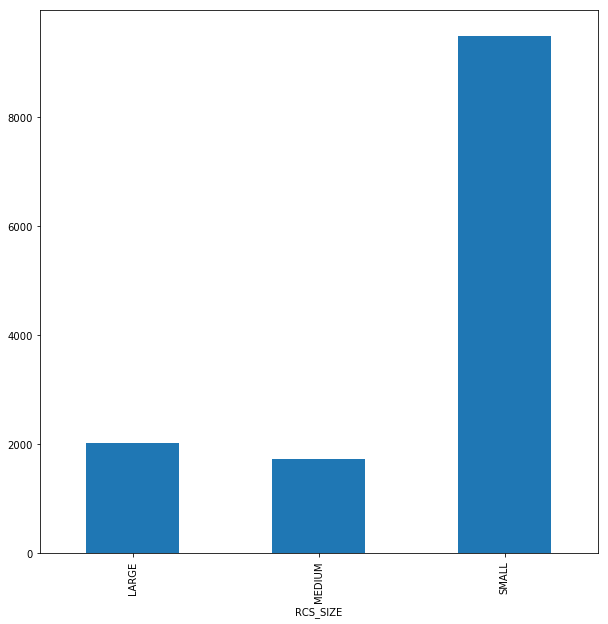

In [36]:
dfobjects = dataset.groupby(['RCS_SIZE'])['RCS_SIZE'].count()
dfobjects.plot(kind='bar')

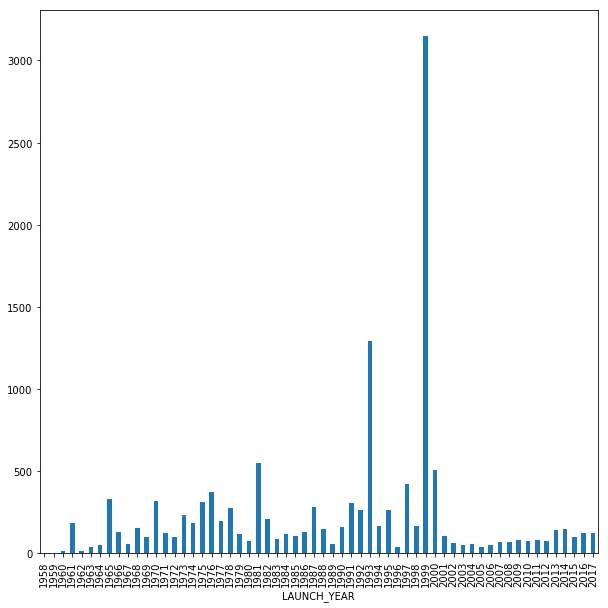

In [38]:
dfobjects = dataset.groupby(['LAUNCH_YEAR'])['LAUNCH_YEAR'].count()
dfobjects.plot(kind='bar')


In [60]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()


In [63]:
vec.fit_transform(data).toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [64]:
#vec.get_feature_names()

['APOGEE=0',
 'APOGEE=1000',
 'APOGEE=1001',
 'APOGEE=1002',
 'APOGEE=1003',
 'APOGEE=1004',
 'APOGEE=1005',
 'APOGEE=1006',
 'APOGEE=1007',
 'APOGEE=1008',
 'APOGEE=1009',
 'APOGEE=1010',
 'APOGEE=1011',
 'APOGEE=1012',
 'APOGEE=1013',
 'APOGEE=1014',
 'APOGEE=1015',
 'APOGEE=1016',
 'APOGEE=1017',
 'APOGEE=1018',
 'APOGEE=1019',
 'APOGEE=1020',
 'APOGEE=1021',
 'APOGEE=1022',
 'APOGEE=1023',
 'APOGEE=1024',
 'APOGEE=1025',
 'APOGEE=1026',
 'APOGEE=1027',
 'APOGEE=1028',
 'APOGEE=1029',
 'APOGEE=1030',
 'APOGEE=1031',
 'APOGEE=1032',
 'APOGEE=1033',
 'APOGEE=1034',
 'APOGEE=1035',
 'APOGEE=1036',
 'APOGEE=1037',
 'APOGEE=1038',
 'APOGEE=1039',
 'APOGEE=1040',
 'APOGEE=1041',
 'APOGEE=1042',
 'APOGEE=1043',
 'APOGEE=1044',
 'APOGEE=1045',
 'APOGEE=1046',
 'APOGEE=1047',
 'APOGEE=1048',
 'APOGEE=1049',
 'APOGEE=1050',
 'APOGEE=1051',
 'APOGEE=1052',
 'APOGEE=1053',
 'APOGEE=1054',
 'APOGEE=1055',
 'APOGEE=1056',
 'APOGEE=1057',
 'APOGEE=1058',
 'APOGEE=1059',
 'APOGEE=1060',
 'APOGEE=10

In [57]:
# Use k-means clustering to see the data
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2)
